<a href="https://colab.research.google.com/github/Mawanrs/Python_AI/blob/main/Toko_Toserba_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Penjualan:
      Tanggal    Kategori  Harga  Jumlah_Terjual  Diskon
0  2024-01-01  Elektronik  50000               5    0.10
1  2024-01-02     Pakaian  20000              10    0.05
2  2024-01-03     Makanan  15000              30    0.00
3  2024-01-04  Elektronik  60000               8    0.15
4  2024-01-05     Pakaian  22000              12    0.10

Data Setelah Pra-pemrosesan:
   Harga  Jumlah_Terjual  Diskon  Bulan  Kategori_Elektronik  \
0  50000               5    0.10      1                 True   
1  20000              10    0.05      1                False   
2  15000              30    0.00      1                False   
3  60000               8    0.15      1                 True   
4  22000              12    0.10      1                False   

   Kategori_Makanan  Kategori_Pakaian  
0             False             False  
1             False              True  
2              True             False  
3             False             False  
4             False        

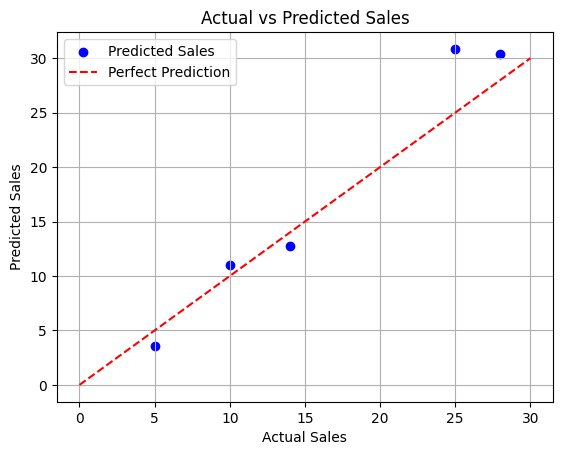

In [27]:
# Nama: Hermawan Rustandi
# Nim: 20220801239
# Tugas: Buatkan contoh pengolahan data menggunakan machine learning yang kalian ketahui di link tersebut

# Contoh sederhana pengolahan data penjualan di toko toserba menggunakan machine learning(menggunakan Regrasi Linear)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. Membuat data penjualan secara manual
data = pd.DataFrame({
    'Tanggal': ['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05',
                '2024-01-06', '2024-01-07', '2024-01-08', '2024-01-09', '2024-01-10'],
    'Kategori': ['Elektronik', 'Pakaian', 'Makanan', 'Elektronik', 'Pakaian',
                 'Makanan', 'Elektronik', 'Pakaian', 'Makanan', 'Elektronik'],
    'Harga': [50000, 20000, 15000, 60000, 22000, 17000, 55000, 24000, 16000, 58000],
    'Jumlah_Terjual': [5, 10, 30, 8, 12, 25, 6, 14, 28, 7],
    'Diskon': [0.1, 0.05, 0.0, 0.15, 0.1, 0.0, 0.2, 0.05, 0.0, 0.1]
})

# 2. Melihat data awal
print("Data Penjualan:")
print(data.head())

# 3. Pra-pemrosesan data
data['Tanggal'] = pd.to_datetime(data['Tanggal'])  # Mengonversi tanggal
data['Bulan'] = data['Tanggal'].dt.month  # Menambahkan kolom bulan
data = data.drop(['Tanggal'], axis=1)  # Menghapus kolom Tanggal

# Mengubah Kategori menjadi dummy variables, tanpa menghapus kategori pertama
data = pd.get_dummies(data, columns=['Kategori'], drop_first=False)

# Melihat data setelah pra-pemrosesan
print("\nData Setelah Pra-pemrosesan:")
print(data.head())

# 4. Memisahkan fitur (X) dan target (y)
X = data.drop('Jumlah_Terjual', axis=1)  # Memisahkan fitur
y = data['Jumlah_Terjual']  # Memisahkan target

# Split data menjadi training dan testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# 5. Inisialisasi dan pelatihan model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Memprediksi dengan data testing
y_pred = model.predict(X_test)

# 7. Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error (MSE): {mse}")

# Visualisasi hasil prediksi vs nilai aktual
plt.scatter(y_test, y_pred, color='blue', label='Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')

# Garis referensi untuk prediksi yang sempurna
plt.plot([0, max(y)], [0, max(y)], color='red', linestyle='--', label='Perfect Prediction')

plt.legend()
plt.grid(True)
plt.show()
